# Get Data

## Importing time series data with pandas

In [6]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/BTC Predictor/BTC_USD_2013-10-01_2021-05-18.csv", 
                 parse_dates = ["Date"],
                 index_col = ["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [8]:
#How many samples?
len(df)

2787

In [9]:
#Only want closing price for each day

bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


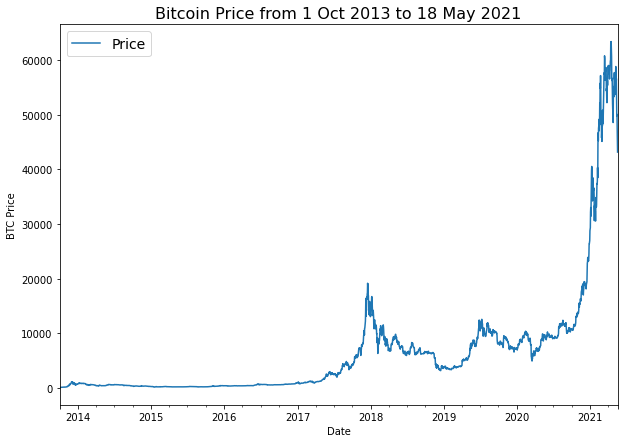

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Bitcoin Price from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Format Data Part 1

### Creating train and test splits for Time Series

In [11]:
# Turn DataFrame Index and column into NumPy arrays

import numpy as np
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

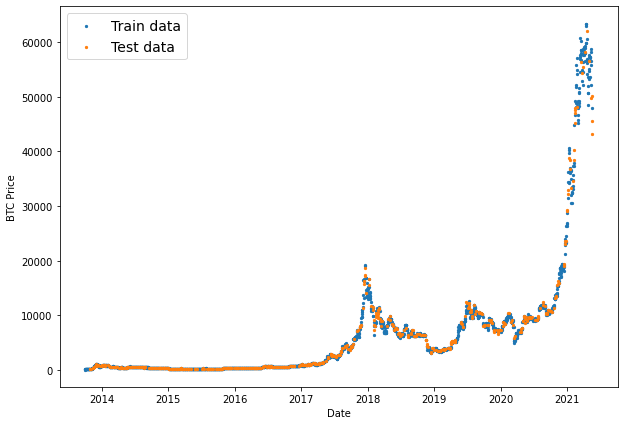

In [13]:
# Plotting wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

This kind of random split is okay for datasets without a time component (such as images for classification problems) but for time series, the time factor has to be taken into account.

We need to split our historical Bitcoin data to have a dataset that reflects the past (train set) and a dataset that reflects the future (test set).

In [14]:
#Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20 % test
            
#Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

#Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

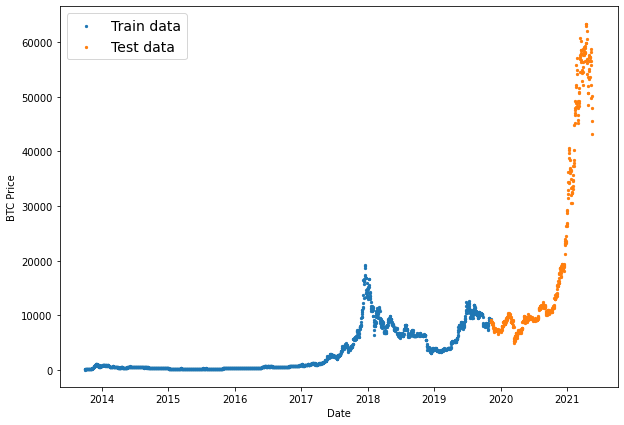

In [15]:
 #Plot correctly made splits
 plt.figure(figsize=(10,7))
 plt.scatter(X_train, y_train, s=5, label='Train data')
 plt.scatter(X_test, y_test, s=5, label='Test data')
 plt.xlabel("Date")
 plt.ylabel("BTC Price")
 plt.legend(fontsize=14)
 plt.show();

### Creating a plotting function for time series data

In [16]:
# Creating a function to plot time series data

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

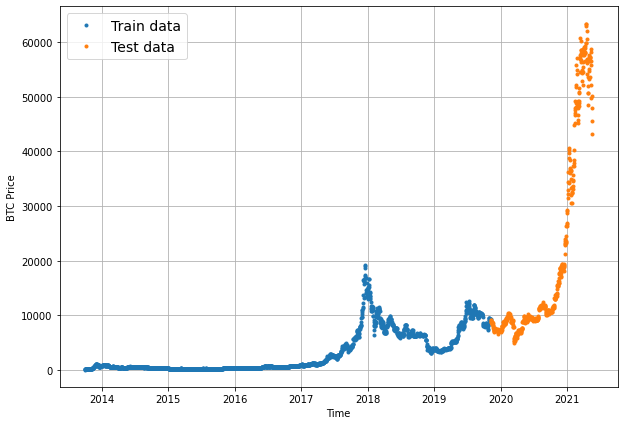

In [17]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Modelling Experiments


Bitcoin historical data is given, to model it, I'll run a series of modelling experiments and see which model performs best.

Terms to be familiar with:

* **Horizon** = number of timesteps into the future that are going to be predicted
* **Window size** = number of timesteps that are going to be used to predict horizon
Modelling experiments:

* 0 Naïve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 LSTM
* 5 Ensemble (multiple models optimized on different loss functions)
* 6 Same as 1 (but with turkey data introduced)

## Model 0: Naive Forecast Model

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) : (this is for a horizon=1)

In [19]:
  #Creating a Naive Forecast

  naive_forecast = y_test[:-1] #offsetting y_test by 1

  naive_forecast[:10], naive_forecast[-10:]

(array([9226.485821, 8794.358645, 8798.042055, 9081.186878, 8711.534339,
        8760.892718, 8749.520591, 8656.970922, 8500.643558, 8469.260899]),
 array([57107.12067, 58788.20968, 58102.19143, 55715.54665, 56573.55547,
        52147.82119, 49764.13208, 50032.69314, 47885.62525, 45604.61575]))

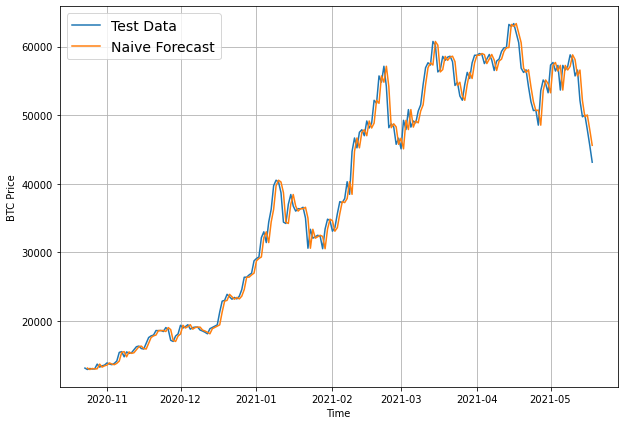

In [20]:
# Plot naive forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps = X_train, values = y_train, label="Train Data")
plot_time_series(timesteps = X_test, values = y_test, start=350, format="-", label="Test Data")
plot_time_series(timesteps = X_test[1:], values = naive_forecast, start=350, format ="-", label="Naive Forecast")

## Evaluating a time series model

In the end a number has to be predicted, that means it is a regression problem, so, some regression-like metrics are needed.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The main thing to evaluate here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**


In [21]:
import tensorflow as tf

In [22]:
# MASE Implementation since it is not in the tf.keras.metrics class
# Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year.

def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [23]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939172406

Above it can be seen that MASE for Naive Forecast is almost 1, which should be the case for Naive Forecast

In practice, if the function is correct, the naïve model should achieve an MASE of 1 (or very close to 1). Any model worse than the naïve forecast will achieve an MASE of >1 and any model better than the naïve forecast will achieve an MASE of <1.

Putting each different evaluation metrics together into a function.

In [24]:
y_test[0].dtype

dtype('float64')

In [25]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations), if not in float32 tensorflow sometimes gives errors
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [26]:
# Testing function 

naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [27]:
# Find average price of bitcoin

tf.reduce_mean(y_test).numpy()

20056.632963623655

- Here we can see that the average price of bitcoin in test dateset is 20,056 dollars
- So, we can say that on an average each prediction in naive forecast is off by 567.98 dollars

## Format Data Part 2: Windowing Dataset


Windowing is a method to turn a time series dataset into supervised learning problem.


Window for one week with the target of predicting the next day (Bitcoin prices)

- [123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
- [125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
- [108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]

In [28]:
# Setting up global variables
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 7 # use one week worth of timesteps to predict the horizon

Writing a function to take in an array and turn it into a window and horizon.

In [29]:
# Create a function to label windowed data  
def get_labelled_windows(x, horizon=1):

  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]
  

In [30]:
# Testing out the window labelling function

test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label:  {tf.squeeze(test_label).numpy()} ")

Window: [1 2 3 4 5 6 7] -> Label:  8 


Function to make windows for an entire time series:

1. Creates a window step of specific window size, for example: [[0, 1, 2, 3, 4, 5, 6, 7]]
2. Uses NumPy indexing to create a 2D of multiple window steps, for example:
```
  - [[0, 1, 2, 3, 4, 5, 6, 7],
  - [1, 2, 3, 4, 5, 6, 7, 8],
  - [2, 3, 4, 5, 6, 7, 8, 9]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. historical price of bitcoin)
4. Use the get_labelled_windows() function created above to turn the window steps into windows with a specified horizon

In [31]:
# Create a function to view numpy arrays as windows

def make_windows(x, window_size=WINDOW_SIZE, horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential lebelled windows of window_size
  """
  # 1. Create a window of a specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis = 0)
  print(f"Window step:\n  {window_step}")

  # 2. Create a 2D array of windows of window_size (minus 1 to account for 0 indexing) using numpy indexing
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  print(f"Windowed array:\n {windowed_array}")

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels
  


In [32]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
print(f"Lenght of full windows: {len(full_windows)} \nLength of full labels: {len(full_labels)}")
len(prices)

Window step:
  [[0 1 2 3 4 5 6 7]]
Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784],
       [2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785],
       [2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786]]), (2780, 8))
Windowed array:
 [[  123.65499   125.455     108.58483 ...   120.65533   121.795
    123.033  ]
 [  125.455     108.58483   118.67466 ...   121.795     123.033
    124.049  ]
 [  108.58483   118.67466   121.33866 ...   123.033     124.049
    125.96116]
 ...
 [58788.20968 58102.19143 55715.54665 ... 49764.13208 50032.69314
  47885.62525]
 [58102.19143 55715.54665 56573.55547 ... 50032.69314 47885.62525
  45604.61575]
 [55715.54665 56573.55547 52147.82119 ... 47885.62525 45604.61575
  43144.47129]]
Lenght of full windows: 2780 
Length of full labels: 2780


2787

In [33]:
# View the first 3 windows/labels

for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [34]:
prices[:15]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
       126.38333, 135.24199, 133.20333])

In [35]:
# View the last 3 windows/labels

for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20968 58102.19143 55715.54665 56573.55547 52147.82119 49764.13208
 50032.69314] -> Label: [47885.62525]
Window: [58102.19143 55715.54665 56573.55547 52147.82119 49764.13208 50032.69314
 47885.62525] -> Label: [45604.61575]
Window: [55715.54665 56573.55547 52147.82119 49764.13208 50032.69314 47885.62525
 45604.61575] -> Label: [43144.47129]


In [36]:
prices[-15:]

array([57255.30684, 53658.84312, 57252.70218, 56583.84988, 57107.12067,
       58788.20968, 58102.19143, 55715.54665, 56573.55547, 52147.82119,
       49764.13208, 50032.69314, 47885.62525, 45604.61575, 43144.47129])

## Turning windows into training and test tests



In [37]:
# Make the test/train splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits, matching pairs of windows and labels into train and test splits
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train and 20% test
  #print(split_size)
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [38]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2224, 556, 2224, 556)

In [39]:
len(full_windows) * 0.8

2224.0

In [40]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [41]:
test_windows[:5], test_labels[:5]

(array([[9290.896602, 9202.415451, 9369.628081, 9326.599624, 9335.752402,
         9226.485821, 8794.358645],
        [9202.415451, 9369.628081, 9326.599624, 9335.752402, 9226.485821,
         8794.358645, 8798.042055],
        [9369.628081, 9326.599624, 9335.752402, 9226.485821, 8794.358645,
         8798.042055, 9081.186878],
        [9326.599624, 9335.752402, 9226.485821, 8794.358645, 8798.042055,
         9081.186878, 8711.534339],
        [9335.752402, 9226.485821, 8794.358645, 8798.042055, 9081.186878,
         8711.534339, 8760.892718]]), array([[8798.042055],
        [9081.186878],
        [8711.534339],
        [8760.892718],
        [8749.520591]]))

In [42]:
# Check to see if train labels are the same (before and after the window split)

np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a Modelling Checkpoint

Because the model's performance will fluctuate from experiment to experiment, the comparison should be done in a way in which each model's best performance is compared against each model's best performance.

For example, if ```model_1``` performed incredibly well on epoch 55 but its performance fell off toward epoch 100, I want the version of the model from epoch 55 to compare to other models rather than the version of the model from epoch 100.

For this: implementing a ```ModelCheckpoint``` callback.

In [43]:
import os

# Create a function to implement a ModelCheckPoint callback with a specific filename
def create_model_checkpoint(model_name, save_path = "/content/drive/MyDrive/BTC Predictor/model_experiments"):
   return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                             monitor = 'val_loss', 
                                             verbose=0, # only output a limited amount of text,
                                             save_best_only = True) 

## Model 1: Dense Model (window =7, horizon =1)

* A single dense layer with 128 units and ReLu
* An output layer with linear activation (no activation) - (here don't use softmax function as we only to predict a number)
* Adam optimization and MAE Loss function 
* And as dataset is small we'll use a batch size of 128 and 100 epochs 

***
* We add a Dense layer of 128 neurons (each neuron is connected to each neuron in previous and next dense layers)
* In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.
* The rectified linear activation (ReLu) function or ReLU is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [44]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"), 
    layers.Dense(HORIZON, activation = "linear")],   # here HORIZON = 1 which is our output neuron, linear activation is the same as having no activation
    name = "model_1_dense")                          # name our model so we can save it

# 2. Compile model
model_1.compile(loss = "mae", 
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"]
                 )
# 3. Fit model
model_1.fit(x= train_windows,
            y= train_labels,
            epochs = 100,
            verbose = 1, # as we don't want to print much data
            batch_size=128  , 
            validation_data = [test_windows, test_labels], # after fitting training data
            callbacks = [create_model_checkpoint(model_1.name)]
            )


Epoch 1/100
18/18 [==============================] - 3s 45ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 29ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 2s 108ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 1s 40ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 29ms/step - loss: 158.

In [45]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [46]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/drive/MyDrive/BTC Predictor/model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forecasts with a model (on the test dataset)

Writing a function to:

1. Take in a train model
2. Take in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [47]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [48]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [49]:
test_labels[:10]

array([[8798.042055],
       [9081.186878],
       [8711.534339],
       [8760.892718],
       [8749.520591],
       [8656.970922],
       [8500.643558],
       [8469.260899],
       [8537.339652],
       [8205.806366]])

In [50]:
# Comparing predicted values of model_1 with the test_values

#But first we have to get test_labels and model_1_preds in the same shape

test_labels.shape, model_1_preds.shape # hence we'll use tf.squeeze for test_labels

((556, 1), TensorShape([556]))

In [51]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_1_preds)

model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

In [52]:
naive_results # As we can see naive model (baseline model) beats model_1 

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

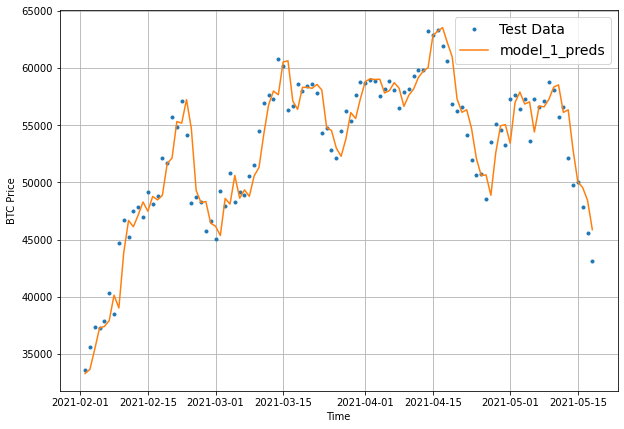

In [53]:
# PLotting model_1 predictions
offset = 450
plt.figure(figsize=(10,7))

plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = test_labels[:, 0],
                 start = offset,
                 label = "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "model_1_preds")

## Model 2: Dense (Window = 30, horizon = 1)

In [54]:
HORIZON = 1 # predict one day of Bitcoin Price
WINDOW_SIZE = 30 # use 30 timesteps in past

In [55]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window step:
  [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]
Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]), array([[2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764,
        2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775,
        2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784],
       [2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765,
        2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776,
        2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785],
       [2756, 2757, 2

(2757, 2757)

In [56]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows= full_windows, 
                                                                                labels = full_labels,
                                                                                test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels) 

(2205, 552, 2205, 552)

In [57]:
from traitlets.traitlets import validate
# Creating, compiling and fitting model

tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear") 
    ], name = "model_2_dense")

# Compile model
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())
# Fit model

model_2.fit(train_windows, 
            train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data=(test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_2_dense/assets
I

In [58]:
# Evaluate model 2 on test data

model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332


659.3331909179688

In [59]:
model_2 = tf.keras.models.load_model("/content/drive/MyDrive/BTC Predictor/model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741


605.8740844726562

In [60]:
# Get forecast predictions
model_2_preds = make_preds(model_2, 
                           input_data = test_windows)

In [61]:
# Evaluate results for model_2 predictions
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                 y_pred = model_2_preds)

model_2_results

{'mae': 605.8741,
 'mape': 2.726445,
 'mase': 1.0590738,
 'mse': 1273360.8,
 'rmse': 1128.4329}

In [62]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

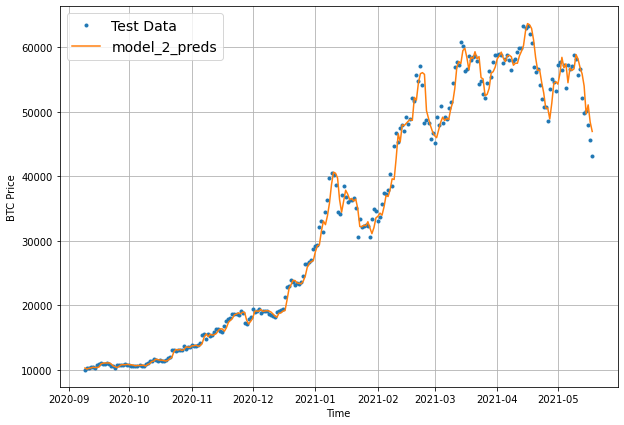

In [63]:
# Plotting

offset = 300
plt.figure(figsize=(10,7))
# Account for test_windows offset when plotting
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = test_labels[:, 0], 
                 start = offset, 
                 label = "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = model_2_preds,
                 format = '-', 
                 start = offset,
                 label = "model_2_preds")

## Model 3: Dense ( window = 30, horizon = 7)

In [64]:
HORIZON = 7
WINDOW_SIZE = 30 

In [65]:
prices[:5]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866])

In [66]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window step:
  [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]]), array([[2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758,
        2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769,
        2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780,
        2781, 2782, 2783, 2784],
       [2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759,


(2751, 2751)

In [67]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows, labels = full_labels,
                                                                                 test_split = 0.2) 
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [68]:
tf.random.set_seed(42)

# Create model (same as model 1 except with different data input and output sizes)

model_3 = tf.keras.Sequential([ 
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)], 
    name = "model_3_dense")

# Compiling model

model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# Fitting model

model_3.fit(x=train_windows, y=train_labels,
            epochs=100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_3_dense/assets
I

In [69]:
# Evaluate the model on the test data

model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1525


1300.1524658203125

In [70]:
# Load the best version of model 3 and evaluate

model_3 = tf.keras.models.load_model("/content/drive/MyDrive/BTC Predictor/model_experiments/model_3_dense/")

model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065


1237.5064697265625

In [71]:
# Making predictions with model 3

model_3_preds = make_preds(model_3, 
                           input_data = test_windows)

model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.891 , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

In [72]:
model_2_results

{'mae': 605.8741,
 'mape': 2.726445,
 'mase': 1.0590738,
 'mse': 1273360.8,
 'rmse': 1128.4329}

In [73]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

In [74]:
# Evaluate model_3_results

model_3_results = evaluate_preds( y_true = tf.squeeze(test_labels), 
                                 y_pred = model_3_preds)

model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53305 ,
         537.854   ,  545.66156 ,  485.9228  ,  584.49713 ,  687.3824  ,
         836.2264  ,  755.1577  ,  731.4958  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80225 ,  188.10799 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.81473 ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78879 ,  190.8118  ,  179.15994 ,  228.26018 ,
         314.44022 ,  379.09244 ,  278.32526 ,  295.3471  ,  299.3852  ,
         248.64983 ,  299.75662 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.941124,
          54.825542,   73.79541 ,  103.60128 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57191 ,  146.91267 ,  240.42912 ,
         351.00662 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98117 ,  277.29486 ,  301.8247  ,  455.718   ,
         458.96017 ,  503.4438  ,  522.3119 

## Make our evaluation function `evaluate_preds` work for larger horizons

In [75]:
model_3_results["mae"].ndim

1

In [76]:
model_2_results["mae"].ndim

0

In [77]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations), if not in float32 tensorflow sometimes gives errors
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # These are the modifications needed:
  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [78]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                 y_pred = model_3_preds)

model_3_results

{'mae': 1237.5065,
 'mape': 5.558879,
 'mase': 2.2020733,
 'mse': 5405199.0,
 'rmse': 1425.7478}

In [79]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.891 , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

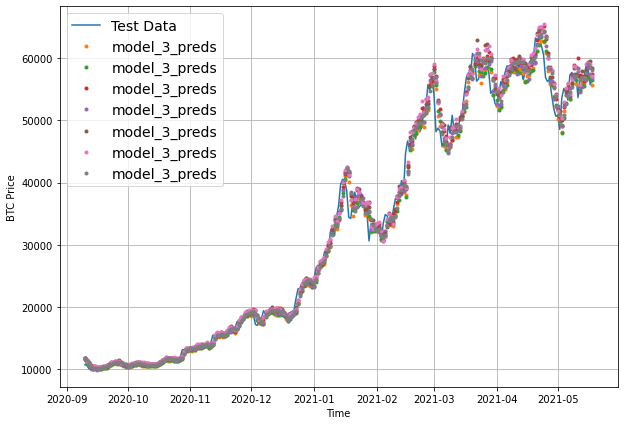

In [80]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = test_labels[:, 0], 
                 start = offset,
                 format = '-', 
                 label= "Test Data")
                 
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = model_3_preds, 
                 start = offset, 
                 format = '.',
                 label= "model_3_preds")

Below we'll lose some values, as we are using `tf.reduce_mean` to visualise the above plot in a better way, as our model's real predictions are across 7 days

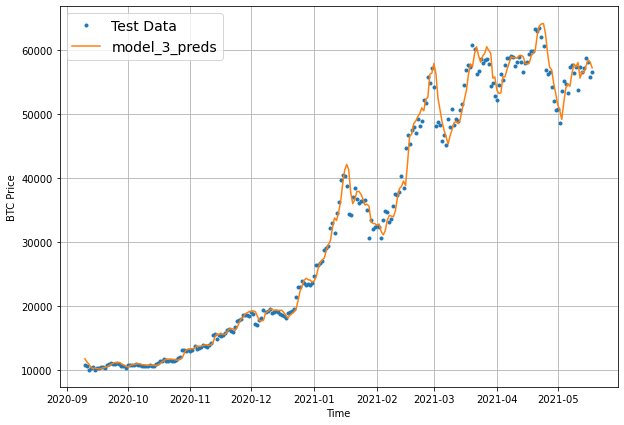

In [81]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = test_labels[:, 0], 
                 start = offset,
                 format = '.', 
                 label= "Test Data")
                 
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = tf.reduce_mean(model_3_preds, axis=1), 
                 start = offset, 
                 format = '-',
                 label= "model_3_preds")

Seeing which model has performed the best so far

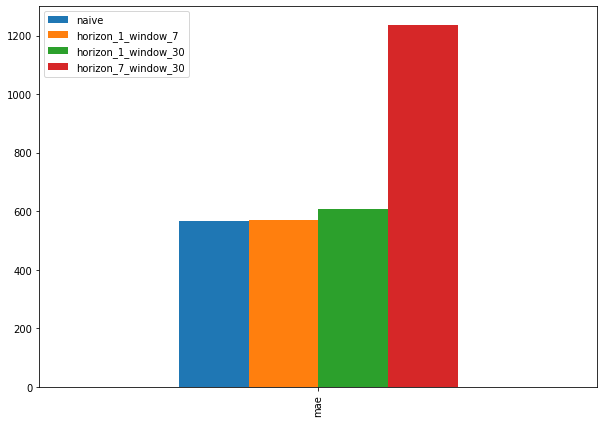

In [82]:
pd.DataFrame({'naive': naive_results["mae"],
              'horizon_1_window_7': model_1_results["mae"],
              'horizon_1_window_30': model_2_results["mae"],
              'horizon_7_window_30': model_3_results["mae"]}, index =["mae"]).plot(figsize=(10,7), kind = "bar") 

Here, we can see our baseline model (naive model) performs the best, and as we try to predict more into the future the error increases.

If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naïve model will often get fairly good results.

## Recreating dataset for our LSTM model

For the next models we'll use HORIZON = 1 and WINDOW_SIZE = 7

In [83]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth of data

In [84]:
# Create windowed data

full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon=HORIZON)

len(full_windows), len(full_labels)

Window step:
  [[0 1 2 3 4 5 6 7]]
Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784],
       [2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785],
       [2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786]]), (2780, 8))
Windowed array:
 [[  123.65499   125.455     108.58483 ...   120.65533   121.795
    123.033  ]
 [  125.455     108.58483   118.67466 ...   121.795     123.033
    124.049  ]
 [  108.58483   118.67466   121.33866 ...   123.033     124.049
    125.96116]
 ...
 [58788.20968 58102.19143 55715.54665 ... 49764.13208 50032.69314
  47885.62525]
 [58102.19143 55715.54665 56573.55547 ... 50032.69314 47885.62525
  45604.61575]
 [55715.54665 56573.55547 52147.82119 ... 47885.62525 45604.61575
  43144.47129]]


(2780, 2780)

In [85]:
# Create train/test splits

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows, labels = full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

We need and an input shape of: `(batch_size, timesteps, input_dim)`

But our data is not in that shape

In [86]:
# Check data input shape

train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [87]:
x = tf.constant(train_windows[0]) # Turning our 0th index of train_windows into a tensor
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [88]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [89]:
# Testing out lambda layer 

print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


## Model 4: RNN (LSTM)

Building RNN model for our time series data

In [90]:
tf.random.set_seed(42)

# Building LSTM model with functional API instead of Sequential API as it is a bit more flexible

inputs = layers.Input(shape=(WINDOW_SIZE)) # input layer
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # reshaping the inputs
x = layers.LSTM(128, activation ="relu")(x) # passing the reshaped inputs through an LSTM
output = layers.Dense(HORIZON, activation = "linear")(x) # and passing through the output

model_4 = tf.keras.Model(inputs = inputs, outputs = output, name = "model_4_LSTM")

# Compile model

model_4.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit model

model_4.fit(train_windows, 
            train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)]
            )



Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2534.5144 INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 3s 125ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 695.4739 INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 266.4913INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 192.6114INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 181.9180 - val_loss: 966.6431
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 170.0374INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 3s 160ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 177.6533INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 143ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 157.6712 - val_loss: 914.8642
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 166.5143 - val_loss: 1079.0776
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 163.3890INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 162.3369 - val_loss: 877.1690
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 163.0841 - val_loss: 924.1126
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 168.5598 - val_loss: 941.6025
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 166.4726 - val_loss: 934.8436
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 163.9537 - val_loss: 920.2160
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 151.0251INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 124ms/step - loss: 152.9470 - val_loss: 856.2653
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 147.4420 - val_loss: 898.9914
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 151.0533 - val_loss: 943.1418
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 157.8232 - val_loss: 924.0046
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 155.9198 - val_loss: 911.4753
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 155.6456 - val_loss: 862.6680
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 153.1514 - val_loss: 862.5831
Epoch 22/100
18/18 [==============================] - 0s 8ms/step - loss: 151.4883 - val_loss: 863.8172
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 150.7770 - val_loss: 886.8356
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 1

INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 146.8467 - val_loss: 845.2782
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 145.1898INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 145.9843 - val_loss: 818.6807
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 150.8635INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 144.4289 - val_loss: 804.3279
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 142.2844INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 123ms/step - loss: 142.4610 - val_loss: 789.0859
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 141.8739 - val_loss: 806.6758
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 142.0521 - val_loss: 794.8836
Epoch 31/100
12/18 [===================>..........] - ETA: 0s - loss: 140.2585INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 138.4690 - val_loss: 773.2812
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 139.7511INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 137.1986 - val_loss: 772.2625
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 135.9342 - val_loss: 786.4805
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 142.0283INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 121ms/step - loss: 136.1931 - val_loss: 744.4506
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 133.4513 - val_loss: 756.2970
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 132.2655INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 134.0992 - val_loss: 735.1729
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 130.6932 - val_loss: 745.9099
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 133.6792INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 129.2891 - val_loss: 717.2498
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 129.6088 - val_loss: 719.0665
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 129.6111 - val_loss: 732.0632
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 130.4034INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 127.1393 - val_loss: 702.9354
Epoch 42/100
14/18 [======================>.......] - ETA: 0s - loss: 123.8576INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 3s 178ms/step - loss: 125.6113 - val_loss: 700.8702
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 125.9959 - val_loss: 704.3682
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 120.2179INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 125.2241 - val_loss: 698.7766
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 118.6115INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 122.5007 - val_loss: 683.0590
Epoch 46/100
11/18 [=================>............] - ETA: 0s - loss: 130.6197INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 124.4726 - val_loss: 679.1873
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 122.1862 - val_loss: 705.4241
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 120.7927INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 122ms/step - loss: 122.0458 - val_loss: 677.0784
Epoch 49/100
12/18 [===================>..........] - ETA: 0s - loss: 126.2884INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 121.1548 - val_loss: 674.6848
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 122.8890 - val_loss: 691.4816
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 122.2994 - val_loss: 737.3929
Epoch 52/100
12/18 [===================>..........] - ETA: 0s - loss: 129.3352INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 121.2944 - val_loss: 657.2365
Epoch 53/100
12/18 [===================>..........] - ETA: 0s - loss: 116.8399INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 121ms/step - loss: 119.7668 - val_loss: 652.7970
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 120.1222 - val_loss: 654.4439
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 125.5305INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 119.2566 - val_loss: 647.2831
Epoch 56/100
12/18 [===================>..........] - ETA: 0s - loss: 121.4963INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 120.0544 - val_loss: 643.7808
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1243 - val_loss: 671.1797
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 120.3613INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 118.4059 - val_loss: 640.2656
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 117.7119 - val_loss: 645.3837
Epoch 60/100
12/18 [===================>..........] - ETA: 0s - loss: 117.1983INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 122ms/step - loss: 118.5346 - val_loss: 638.7429
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 118.3129 - val_loss: 689.4144
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 121.4350 - val_loss: 748.5565
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 123.1006 - val_loss: 651.8298
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 115.9679 - val_loss: 672.9166
Epoch 65/100
11/18 [=================>............] - ETA: 0s - loss: 120.7008INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 118.8341 - val_loss: 631.7538
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2212 - val_loss: 634.5445
Epoch 67/100
12/18 [===================>..........] - ETA: 0s - loss: 113.0850INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 116.1580 - val_loss: 623.8932
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5543 - val_loss: 635.4929
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 120.5866 - val_loss: 626.3387
Epoch 70/100
12/18 [===================>..........] - ETA: 0s - loss: 111.8156INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 114.9188 - val_loss: 619.3181
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8998 - val_loss: 650.9373
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 118.2033 - val_loss: 630.5287
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 115.3612 - val_loss: 623.0369
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 115.0345 - val_loss: 623.0776
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2057 - val_loss: 640.5281
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 114.5117INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 126ms/step - loss: 114.1402 - val_loss: 614.4062
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5973 - val_loss: 689.8776
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 117.2611 - val_loss: 645.2790
Epoch 79/100
12/18 [===================>..........] - ETA: 0s - loss: 112.1790INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 114.1995 - val_loss: 608.7158
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 112.7125 - val_loss: 614.9222
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3684 - val_loss: 634.8466
Epoch 82/100
12/18 [===================>..........] - ETA: 0s - loss: 120.5586INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 115.9701 - val_loss: 607.8510
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3599 - val_loss: 628.8181
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 114.4113 - val_loss: 628.5579
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8363 - val_loss: 634.7715
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5462 - val_loss: 613.5223
Epoch 87/100
12/18 [===================>..........] - ETA: 0s - loss: 115.3621INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 120ms/step - loss: 112.5059 - val_loss: 604.7603
Epoch 88/100
11/18 [=================>............] - ETA: 0s - loss: 114.8154INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 111.7706 - val_loss: 601.5748
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8470 - val_loss: 624.0131
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 115.6354 - val_loss: 662.9452
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 116.1836 - val_loss: 636.0310
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1700 - val_loss: 606.0366
Epoch 93/100
11/18 [=================>............] - ETA: 0s - loss: 113.7486INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 112.4748 - val_loss: 599.8319
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2637 - val_loss: 601.3256
Epoch 95/100
10/18 [===============>..............] - ETA: 0s - loss: 108.2715INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 111.0185 - val_loss: 597.1485
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 112.3787 - val_loss: 601.1596
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4700 - val_loss: 626.1573
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7326 - val_loss: 601.0142
Epoch 99/100
12/18 [===================>..........] - ETA: 0s - loss: 109.4926INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/assets


18/18 [==============================] - 2s 126ms/step - loss: 110.7480 - val_loss: 594.6030
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9943 - val_loss: 595.9847


In [91]:
# Load in best version of model_4 and evaluate on test data
model_4 = tf.keras.models.load_model("/content/drive/MyDrive/BTC Predictor/model_experiments/model_4_LSTM/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.6030


594.6029663085938

In [92]:
# Make prediction with LSTM model 
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8978.46 , 8810.951, 8997.779, 8836.308, 8731.047], dtype=float32)>

In [93]:
# Evaluate model 4 predictions

model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels), 
                               y_pred = model_4_preds)

model_4_results

{'mae': 594.60297,
 'mape': 2.6717565,
 'mase': 1.0445527,
 'mse': 1267231.9,
 'rmse': 1125.7139}

In [94]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

## Preparing Data for Model 5 (Ensemble) using `tf.data` API

Use: 

To make our data performant, i.e. to make our input data load as fast as possible

In [95]:
HORIZON = 1
WINDOW_SIZE = 7

In [96]:
# Create data inputs

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [97]:
# Add windowed columns

bitcoin_prices_ensemble = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_ensemble[f"Price+{i+1}"] = bitcoin_prices_ensemble["Price"].shift(periods=i+1)

bitcoin_prices_ensemble.head() 

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [98]:
# Make features and labels

X = bitcoin_prices_ensemble.dropna().drop("Price", axis = 1)
y = bitcoin_prices_ensemble.dropna()["Price"]

# Make train and test splits

split_size = int(len(X) *  0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [99]:
# Making our dataset performant using tf.data api

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train) # from_tensor_slices() creates a dataset whose elements 
                                                                     # are slices of the given tensors
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Compining labels and features by zipping together into a tuple -> (features, labels)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset)) # zip() creates a Dataset by zipping together the given datasets
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch

BATCH_SIZE = 1024

# Batch -  The tf.data.Dataset.batch() function is used to group the elements into batches.
# Prefetch - Creates a Dataset that prefetches elements from this dataset. 
#            Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

1. batch( batch_size, name=None)

  - Combines consecutive elements of this dataset into batches. 

2. prefetch( buffer_size, name=None)

  - Creates a Dataset that prefetches elements from this dataset.
  - Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

## Model 5: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect


### Constructing and fitting an ensemble of models (using different loss functions)

In [100]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, # number of models we are going to train
                        num_epochs=1000, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                # The above Early Stopping callback means: if "val_loss" doesn't improve for 200 epochs, stop training and
                # restore our model to the best_weights, so that we are not burning through extra epochs that we don't have to
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
                # The above ReduceLROnPlateau means: reduces the learning rate by a factor of 0.1, if "val_loss" doesn't 
                # improve after a 100 epochs
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [101]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 650: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 791: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 891: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 624: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 724: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 361: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 715: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 815: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 563: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing 

In [102]:
!nvidia-smi

Mon Aug  8 20:37:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    25W /  70W |    462MiB / 15109MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [103]:
ensemble_models

### Make predictions with our ensemble model

In [104]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [105]:
# Create a list of ensemble preds
%%time

ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models, 
                                     data = test_dataset)

ensemble_preds

CPU times: user 610 ms, sys: 37.2 ms, total: 647 ms
Wall time: 637 ms


In [106]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8778.674 ,  8843.493 ,  9064.171 , ..., 49279.664 , 48609.297 ,
        46203.156 ],
       [ 8736.658 ,  8787.107 ,  9039.8125, ..., 50116.11  , 48259.85  ,
        45876.703 ],
       [ 8780.267 ,  8805.378 ,  9092.468 , ..., 50267.844 , 48242.688 ,
        45886.45  ],
       ...,
       [ 8661.287 ,  8642.298 ,  9134.07  , ..., 49868.92  , 48643.95  ,
        45533.344 ],
       [ 8812.776 ,  8754.445 ,  9002.784 , ..., 49482.824 , 48219.027 ,
        46167.91  ],
       [ 8809.392 ,  8810.626 ,  9067.475 , ..., 50012.508 , 47947.445 ,
        45541.402 ]], dtype=float32)>

Now we've got a set of ensemble predictions, we can evaluate them against the ground truth values.

However, since we've trained 15 models, there's going to be 15 sets of predictions. Rather than comparing every set of predictions to the ground truth, let's take the median (you could also take the mean too but the median is usually more robust than the mean).

In [107]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8794.825, 8775.06 , 9057.606, 8712.127, 8741.391, 8716.866,
       8647.917, 8483.576, 8452.958, 8520.001], dtype=float32)

In [108]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true = y_test, 
                                  y_pred = ensemble_median)

ensemble_results

{'mae': 565.0479,
 'mape': 2.554046,
 'mase': 0.9926327,
 'mse': 1131961.5,
 'rmse': 1063.9368}

It looks like the ensemble model is the best performing model so far

## Why forecasting doesn't work (the turkey problem)

You could have the historical data of Bitcoin for its entire existence and build a model which predicts it perfectly.

But then one day for some unknown and unpredictable reason, the price of Bitcoin plummets 100x in a single day.

Just like a turkey could live 1000 days eating healthy, and on the day of thanksgiving (1001st day) it may become a roasted turkey.

In [109]:
btc_price_turkeys = bitcoin_prices.copy()

In [110]:
len(btc_price_turkeys)

2787

In [111]:
btc_price_turkey = btc_price_turkeys["Price"].values.tolist()


# Introducing the above problem in our BTC data (price of BTC falls 100x in 1 day)

btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [112]:
btc_price_turkey[-10:]

[58788.20968,
 58102.19143,
 55715.54665,
 56573.55547,
 52147.82119,
 49764.13208,
 50032.69314,
 47885.62525,
 45604.61575,
 431.4447129]

In [113]:
# Get the timesteps for the turkey problem

btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

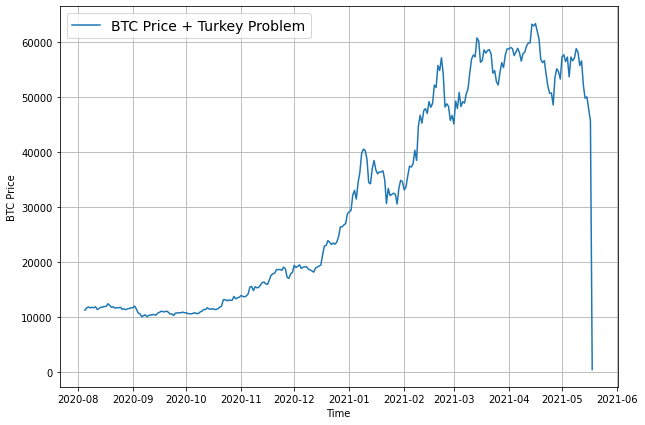

In [114]:
# Plotting our turkey data

plt.figure(figsize=(10, 7))
plot_time_series(timesteps = btc_timesteps_turkey, values=btc_price_turkey, format='-', start = 2500, label = "BTC Price + Turkey Problem")

## Preparing data for the turkey model

In [115]:
HORIZON = 1
WINDOW_SIZE = 7

In [116]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

Window step:
  [[0 1 2 3 4 5 6 7]]
Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784],
       [2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785],
       [2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786]]), (2780, 8))
Windowed array:
 [[  123.65499     125.455       108.58483   ...   120.65533
    121.795       123.033    ]
 [  125.455       108.58483     118.67466   ...   121.795
    123.033       124.049    ]
 [  108.58483     118.67466     121.33866   ...   123.033
    124.049       125.96116  ]
 ...
 [58788.20968   58102.19143   55715.54665   ... 49764.13208
  50032.69314   47885.62525  ]
 [58102.19143   55715.54665   56573.55547   ... 50032.69314
  47885.62525   45604.61575  ]
 [55715.54665   56573.55547   52147.82119   ... 47885.62525
  45604.61575     431.4447129]]


(2780, 2780)

In [117]:
# Create train and test sets for turkey problem data

X_train, X_test, y_train, y_test = make_train_test_splits(windows = full_windows, labels = full_labels)

len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

## Model 6: Turkey Model

In [118]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data

turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_6_turkey_model" # To access and change the name feature in model.keras.Sequential() in model 1

# Compile the model
turkey_model.compile(loss="mae",
                     optimizer = tf.keras.optimizers.Adam())

# Fit the model

turkey_model.fit(x = X_train,
                 y = y_train,
                 batch_size = 128,
                 epochs = 100,
                 verbose = 0,
                 validation_data = [X_test, y_test],
                 callbacks = [create_model_checkpoint(model_name = "model_6_turkey_model")])

INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/assets


In [119]:
# Evaluate turkey model on test data

turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 807.1151


807.1150512695312

In [120]:
# Load best performing turkey model and evaluate on test data

turkey_model = tf.keras.models.load_model(filepath = '/content/drive/MyDrive/BTC Predictor/model_experiments/model_6_turkey_model/')
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 637.4183


637.4182739257812

In [121]:
# Make predictions with turkey model

turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8817.066 , 8783.974 , 9029.472 , 8763.059 , 8774.349 , 8712.79  ,
       8650.94  , 8553.647 , 8434.3125, 8527.643 ], dtype=float32)>

In [122]:
# Evaluate turkey preds

turkey_results = evaluate_preds(y_true = y_test, 
                                y_pred = turkey_preds)
turkey_results

{'mae': 17134.238,
 'mape': 121.42651,
 'mase': 26.515285,
 'mse': 614681100.0,
 'rmse': 23721.217}

In [123]:
model_1_results

{'mae': 568.95105,
 'mape': 2.5448983,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

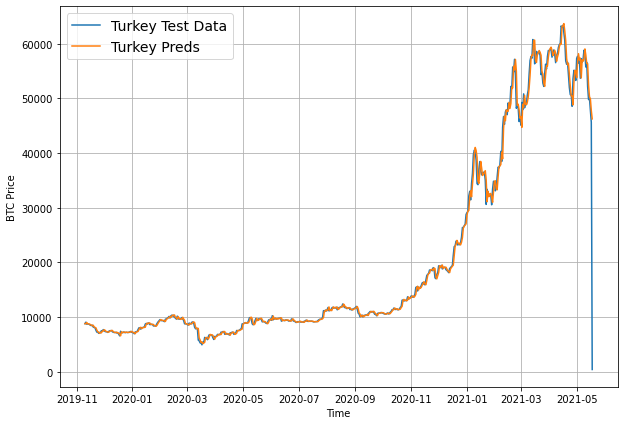

In [124]:
# Plotting the results

plt.figure(figsize = (10, 7))
offset = 0
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):], 
                 values = btc_price_turkey[-len(y_test):],
                 format = '-',
                 start = offset,
                 label = "Turkey Test Data")

plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):], 
                 values = turkey_preds,
                 format = '-',
                 start = offset,
                 label = "Turkey Preds")

Why does our model fail to capture the turkey problem data point?

Think about it like this, just like a turkey who lives 1000 joyful days, based on observation alone has no reason to believe day 1001 won't be as joyful as the last, a model which has been trained on historical data of Bitcoin which has no single event where the price decreased by 100x in a day, has no reason to predict it will in the future.

A model cannot predict anything in the future outside of the distribution it was trained on.

In turn, highly unlikely price movements (based on historical movements), upward or downward will likely never be part of a forecast.

However, as we've seen, despite their unlikeliness, these events can have catastrophic impacts to the performance of our models.

## Comparing Models

In [125]:
# Compare different model resutls (w = window, h = horizon, e.g. w = 7 means a window_size of 7)

model_results = pd.DataFrame({"naive_model": naive_results,
                             "model_1_dense_w7_h1": model_1_results,
                             "model_2_dense_w30_h1": model_2_results,
                             "model_3_dense_w30_h7": model_3_results,
                             "model_4_LSTM": model_4_results,
                             "model_5_ensemble": ensemble_results,
                             "model_6_turkey_model": turkey_results}).T
              
model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951050,1.171744e+06,1082.471069,2.544898,0.999489
model_2_dense_w30_h1,605.874084,1.273361e+06,1128.432861,2.726445,1.059074
model_3_dense_w30_h7,1237.506470,5.405199e+06,1425.747803,5.558879,2.202073
model_4_LSTM,594.602966,1.267232e+06,1125.713867,2.671757,1.044553
model_5_ensemble,565.047913,1.131962e+06,1063.936768,2.554046,0.992633
model_6_turkey_model,17134.238281,6.146811e+08,23721.216797,121.426514,26.515285


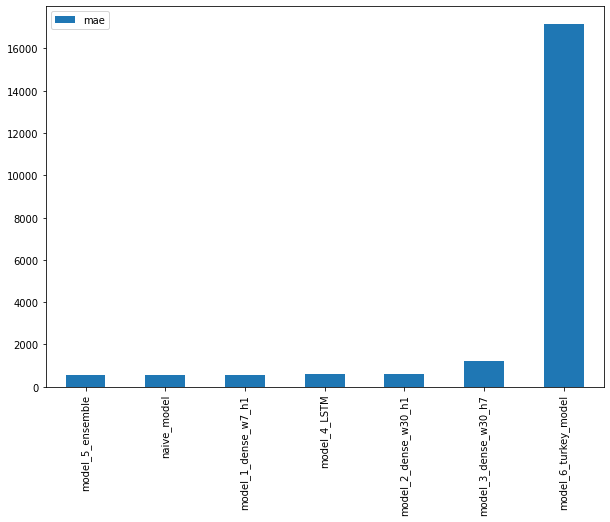

In [135]:
# Sort model results by MAE and plot them

model_results = model_results[["mae"]].sort_values(by="mae")

model_results.plot(figsize=(10, 7), kind = "bar")

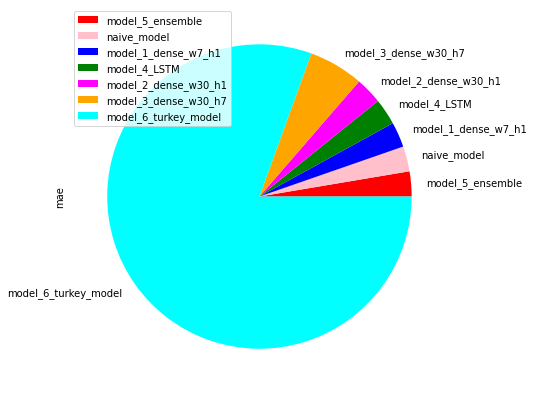

In [143]:
model_results.plot.pie(y="mae", figsize = (10,7), colors = ['red', 'pink', 'blue', 'green', 'magenta', 'orange', 'cyan'])


* Only the ensemble model performs on par or only slightly better than the naive model. And for the turkey model, changing a single data point destroys its performance.

* Forecasting in a closed system (such as predicting the demand of electricity) often yields quite usable results, while forecasting methods usually don't perform well in open systems.

* So not knowing the future is a benefit. A known future is already the past.


# THE END